seaborn 5가지 정도 유용, 더 쓰고 싶으면 사이트에서 코드복사사용

https://seaborn.pydata.org/index.html

## LoadData

In [7]:
import pandas as pd
#path
train = pd.read_csv("train.csv",index_col="PassengerId")
print(train.shape)
train.head()

(891, 11)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Explore

In [8]:
#바로 화면에 띄어주라는 명령
%matplotlib inline 
import seaborn as sns

### countplot #개수

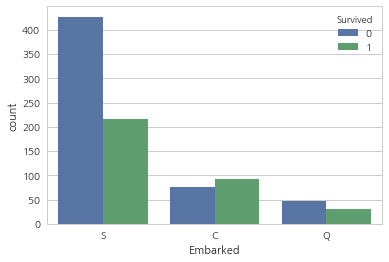

In [9]:
#sns.countplot(data=train, x="Embarked")

#x컬럼을 hue컬럼을 기준으로 한번 더 구분해서 보여준다.
sns.countplot(data=train, x="Embarked",hue="Survived")

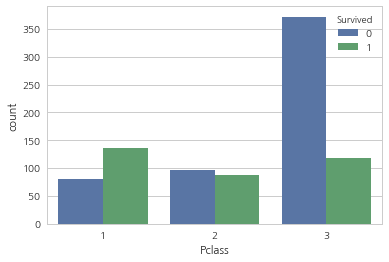

In [10]:
#sns.countplot(data=train, x="Pclass")

#x컬럼을 hue컬럼을 기준으로 한번 더 구분해서 보여준다.
sns.countplot(data=train, x="Pclass",hue="Survived")

## barplot

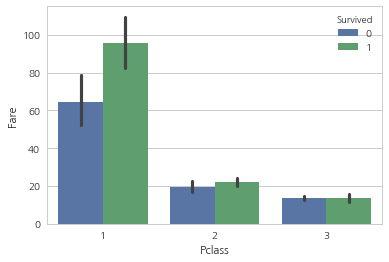

In [11]:
#countplot는 y값이 해당 컬럼의 범주값의 데이터개수를 가리킨다.
#regression model에 적합한 그래프는 barplot이다.
#Fare의 mean값이 barplot에 나타난다. 검정색은 표준편차이다.

sns.barplot(data=train,x="Pclass", y="Fare", hue="Survived")

## pointplot

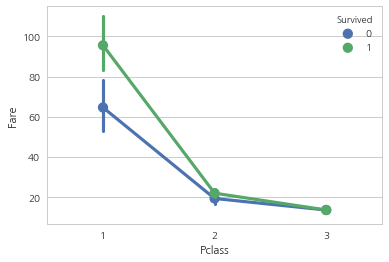

In [12]:
## barplot을 사용할 때, 예외적으로 
## x축 컬럼이 연속형 데이터라면 pointplot이 적합하다.

sns.pointplot(data=train,x="Pclass", y="Fare", hue="Survived")

## distplot

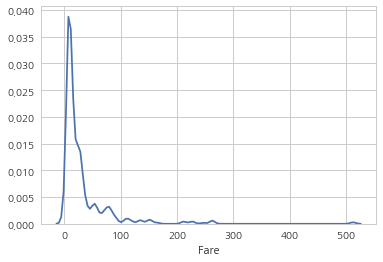

In [13]:
#sns.distplot(train["Fare"])
# histogram : 막대그래프를 삭제하고 싶을 때, 아래와 같이 쓴다
sns.distplot(train["Fare"],hist=False)

### outlier를 제거하여 시각화를 아름답게 만들어보자

(838, 11)


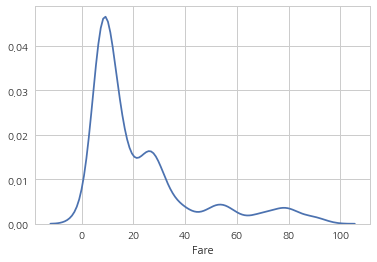

In [14]:
low_fare=train[train["Fare"]<100]
print(low_fare.shape)
low_fare.head()

sns.distplot(low_fare["Fare"],hist=False)


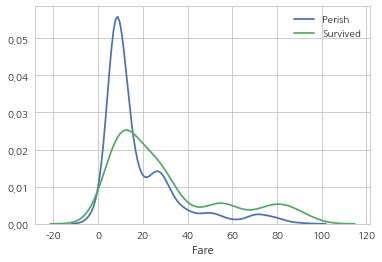

In [15]:
#distplot 의 단점
#1) data 값을 변수/컬럼 하나만 받는다
#2) hue 기능 추가도 불가능해서 
##한 그래프안에 동시에 두가지 그래프를 그리기위해
#다른 방법을 사용해야 한다

#테이블의 값을 변경시켜서 새로운 컬럼 하나를 만든다.
perish=low_fare[low_fare["Survived"]==0]
survived=low_fare[low_fare["Survived"]==1]

sns.distplot(perish["Fare"],hist=False,label="Perish")
sns.distplot(survived["Fare"],hist=False,label="Survived")

## lmplot (scatter plot)

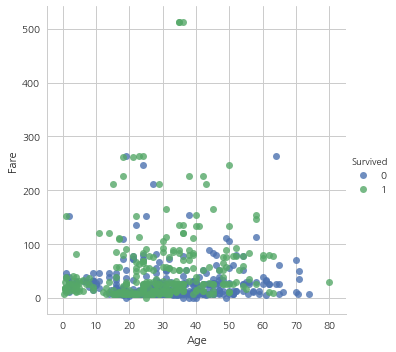

In [16]:
#범주형이 아닌 정수형/연속형데이터에 적합하다
sns.lmplot(data=train, x="Age",y="Fare", fit_reg=False, hue="Survived")

(838, 11)


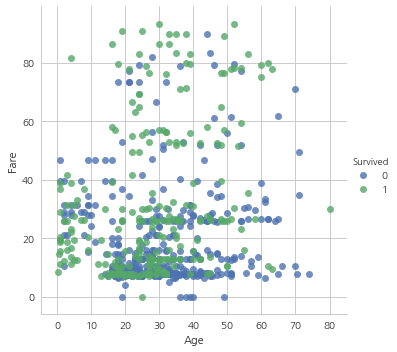

In [17]:
low_fare=train[train["Fare"]<100]

print(low_fare.shape)
low_fare.head()

sns.lmplot(data=low_fare,x="Age",y="Fare",fit_reg=False, hue="Survived")

## subplots

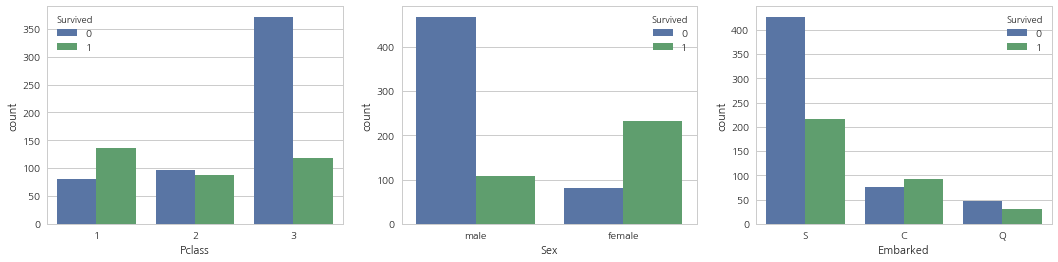

In [18]:
import matplotlib.pyplot as plt
figure, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3)
figure.set_size_inches(18,4)
#figure : 전체 그래프의 이름
#ax1,ax2,ax3 : 내부 개별 그래프의 이름

sns.countplot(data=train, x="Pclass", hue="Survived", ax=ax1)
sns.countplot(data=train, x="Sex", hue="Survived", ax=ax2)
sns.countplot(data=train, x="Embarked", hue="Survived", ax=ax3)

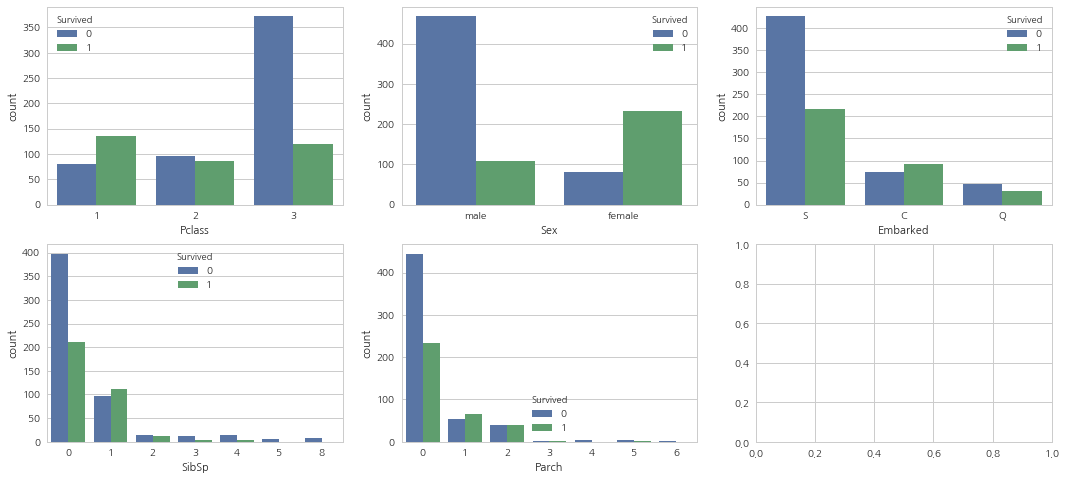

In [19]:
#rowcolum에 따라 표현법 수정해야.

#axes ==  ((ax1,ax2,ax3),(ax4,ax5,ax6)) : axes로 대체가능하다
#ax = ax2 -> ax = axes[0][1] : 2차배열로 대체가능하다
figure, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = \
plt.subplots(nrows=2, ncols=3)
figure.set_size_inches(18,8)


sns.countplot(data=train, x="Pclass", hue="Survived", ax=ax1)
sns.countplot(data=train, x="Sex", hue="Survived", ax=ax2)
sns.countplot(data=train, x="Embarked", hue="Survived", ax=ax3)
sns.countplot(data=train, x="SibSp", hue="Survived", ax=ax4)
sns.countplot(data=train, x="Parch", hue="Survived", ax=ax5)
#sns.countplot(data=train, x="Fare", hue="Survived", ax=ax6)

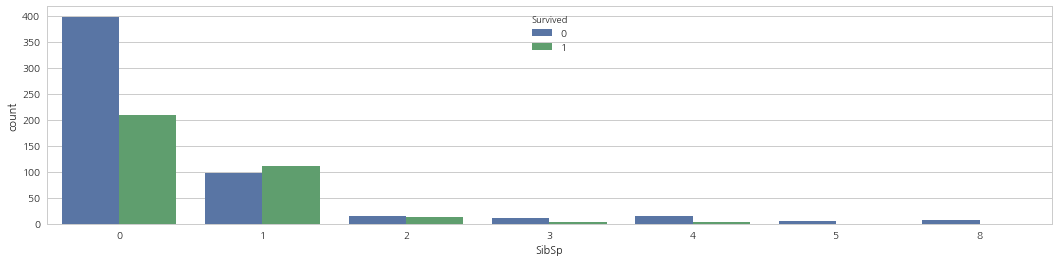

In [20]:
# 그래프 하나를 사용하더라도 그래프 크기를 조정하고 싶을 때 
# subplots 사용한다
figure, ax = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(18,4)
#figure : 전체 그래프의 이름
#ax1,ax2,ax3 : 내부 개별 그래프의 이름

sns.countplot(data=train, x="SibSp", hue="Survived", ax=ax)


scikit-learn.org

중요 hyperparameter

n_estimator(tree개수) : 높을수록 좋다, 단점: 시간이 오래걸림
max_depth ()
max_features(col개수)
n_jobs (병렬처리 코어개수) : -1 : 컴퓨터의 코어개수만큼 활용해준다/속도up